In [1]:
store_location = None  # Replace with path to store directory on PC to override default
if not store_location:
    store_location = "C:\\stores"
    
import pystore

pystore.set_path(store_location)

WindowsPath('C:/stores')

In [2]:
store = pystore.store("ib")
collection_trades = store.collection("trades-30m")
print(f"{len(collection_trades.list_items())} tickers available in trades-30m")
collection_iv = store.collection("implied_vol-30m")
print(f"{len(collection_iv.list_items())} tickers available in implied_vol-30m")


150 tickers available in trades-30m
148 tickers available in implied_vol-30m


In [8]:
ticker = "AAPL"
trades = collection_trades.item(ticker)
trades_df = trades.to_pandas()
trades_df

,open,high,low,close,volume,barCount,average
2020-10-15 09:30:00,118.75,120.64,118.15,120.20,161199.0,57723.0,119.767
2020-10-15 10:00:00,120.18,120.38,119.20,119.57,103149.0,37467.0,119.774
2020-10-15 10:30:00,119.54,119.85,119.01,119.74,80010.0,28846.0,119.373
2020-10-15 11:00:00,119.74,120.11,119.17,119.85,66575.0,23419.0,119.764
2020-10-15 11:30:00,119.84,120.39,119.75,120.29,58242.0,19794.0,120.101
...,...,...,...,...,...,...,...
2021-01-22 13:30:00,138.00,138.32,137.87,138.00,38156.0,14135.0,138.140
2021-01-22 14:00:00,138.00,138.49,137.88,138.43,41372.0,15751.0,138.232
2021-01-22 14:30:00,138.42,139.19,138.38,139.09,56976.0,19835.0,138.761
2021-01-22 15:00:00,139.09,139.44,138.63,139.36,73888.0,25921.0,138.978


<IPython.core.display.Javascript object>


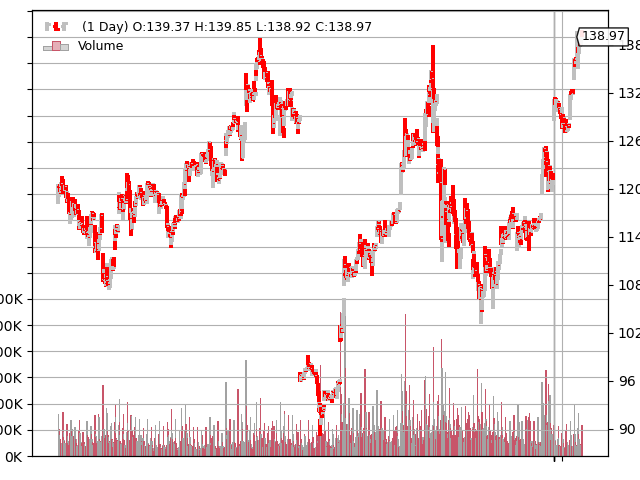

[[<Figure size 640x480 with 2 Axes>]]

In [9]:
import backtrader as bt


# Create a cerebro entity
cerebro = bt.Cerebro(stdstats=False)
cerebro.adddata(bt.feeds.PandasData(dataname=trades_df, openinterest=None))
cerebro.run()
cerebro.plot(style='bar')

But we would rather have all our columns show up in the strategy feed and plot...

In [11]:
iv = collection_iv.item(ticker)
iv_df = iv.to_pandas()
iv_df

,open,high,low,close,barCount,average
2020-07-27 09:30:00,0.333650,0.354271,0.333650,0.342524,0.0,0.354271
2020-07-27 10:00:00,0.342524,0.342524,0.337857,0.339746,0.0,0.342524
2020-07-27 10:30:00,0.339746,0.339746,0.337413,0.339111,0.0,0.339746
2020-07-27 11:00:00,0.339111,0.342000,0.338952,0.342000,0.0,0.342000
2020-07-27 11:30:00,0.342000,0.343842,0.341556,0.342016,0.0,0.343842
...,...,...,...,...,...,...
2021-01-22 13:30:00,0.410245,0.413690,0.409769,0.412832,0.0,0.413690
2021-01-22 14:00:00,0.412832,0.415737,0.410213,0.415737,0.0,0.415737
2021-01-22 14:30:00,0.415737,0.421452,0.414087,0.421103,0.0,0.421452
2021-01-22 15:00:00,0.421103,0.421103,0.417071,0.417833,0.0,0.421103


<IPython.core.display.Javascript object>


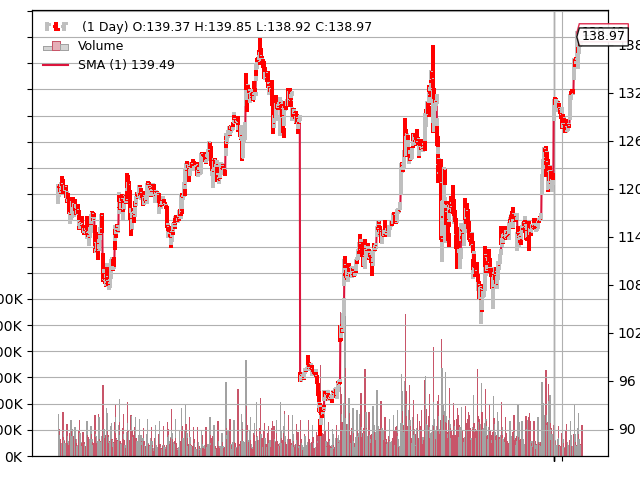

[[<Figure size 640x480 with 2 Axes>]]

In [12]:
import backtrader.indicators as btind

class PandasDataWithWap(bt.feeds.PandasData):

    # Add a 'wap' line to the inherited ones from the base class
    lines = ('average',)

    # add the parameter to the parameters inherited from the base class
    params = (('average', -1),)

class WAPStrategy(bt.Strategy):
    def __init__(self):
        # The indicator autoregisters and will plot even if no obvious
        # reference is kept to it in the class
        btind.SMA(self.data.average, period=1, subplot=False)
    
# Create a cerebro entity
feed = PandasDataWithWap(dataname=df, openinterest=None)
cerebro = bt.Cerebro(stdstats=False)
cerebro.adddata(PandasDataWithWap(dataname=df, openinterest=None))
cerebro.addstrategy(WAPStrategy)
cerebro.run()
cerebro.plot(style='bar')

In [7]:
cerebro